In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = './comparsion.xlsx'
data = pd.read_excel(file_path)
data.head()

,Target,Human,GeoMetirc,VGG16,Our Method,ViT
0,happy,0.84,0.86,0.84,0.91,0.90
1,unhappy,0.75,0.81,0.80,0.87,0.87
2,friendly,0.78,0.83,0.82,0.88,0.87
3,unfriendly,0.72,0.80,0.79,0.83,0.83
4,sociable,0.74,0.78,0.78,0.84,0.84


In [8]:
from scipy import stats
data_for_analysis = data.iloc[:, 1:]

f_value, p_value = stats.f_oneway(data_for_analysis.iloc[:, 0], 
                                  data_for_analysis.iloc[:, 1],
                                  data_for_analysis.iloc[:, 2], 
                                  data_for_analysis.iloc[:, 3],
                                  data_for_analysis.iloc[:, 4]
                                 )

print(f"F-value: {f_value}, P-value: {p_value}")

F-value: 7.786762972049211, P-value: 7.66448493489295e-06


In [14]:
t_stat, p_value = stats.ttest_ind(data_for_analysis.iloc[:, 0], data_for_analysis.iloc[:, 2])
print(f"t={t_stat}, p={p_value}")
t_stat, p_value = stats.ttest_ind(data_for_analysis.iloc[:, 1], data_for_analysis.iloc[:, 2])
print(f"t={t_stat}, p={p_value}")
t_stat, p_value = stats.ttest_ind(data_for_analysis.iloc[:, 2], data_for_analysis.iloc[:, 3])
print(f"t={t_stat}, p={p_value}")
t_stat, p_value = stats.ttest_ind(data_for_analysis.iloc[:, 3], data_for_analysis.iloc[:, 4])
print(f"t={t_stat}, p={p_value}")

t=-3.557975249801204, p=0.0006395915412666505
t=-0.8167535147539545, p=0.41655690092259323
t=-1.0054646981400808, p=0.3177821804432188
t=-0.27207211564437, p=0.7862854590528472


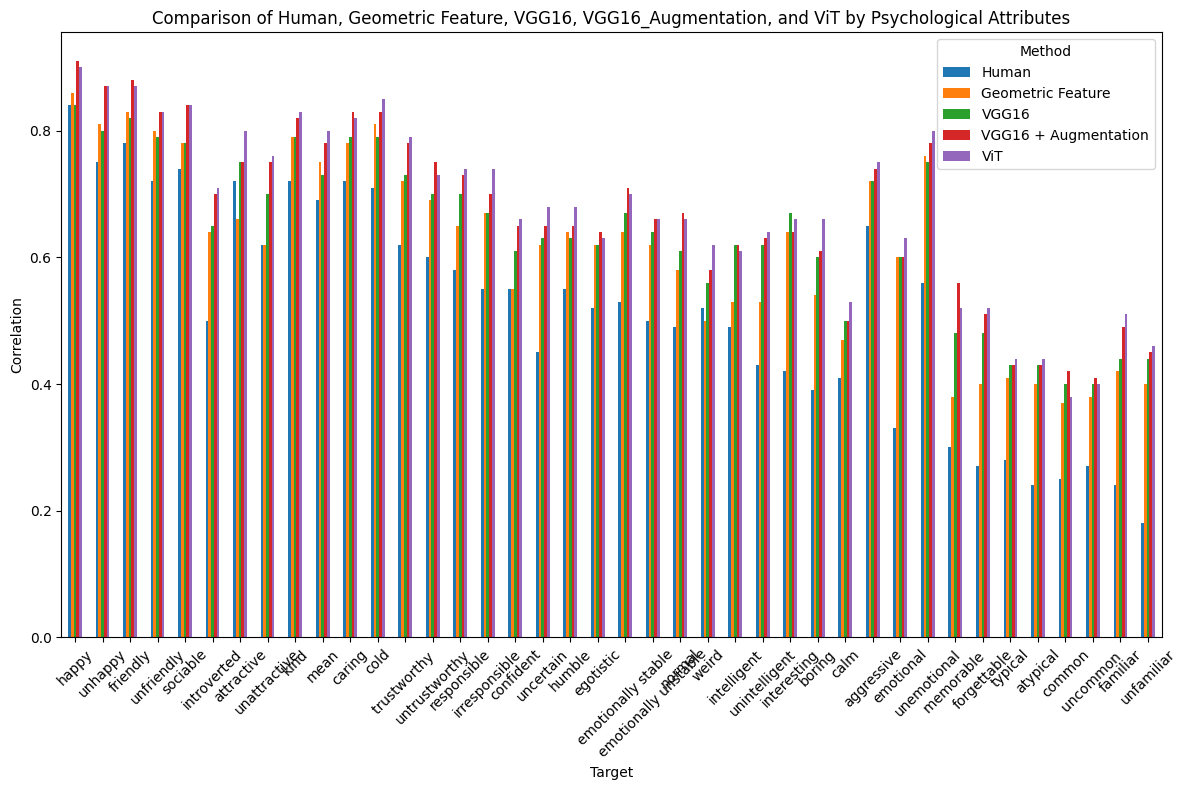

In [3]:
data.columns = ['Target', 'Human', 'Geometric Feature', 'VGG16', 'VGG16 + Augmentation', 'ViT']
fig, ax = plt.subplots(figsize=(12, 8))
data.set_index('Target').plot(kind='bar', ax=ax)
ax.set_ylabel('Correlation')
ax.set_title('Comparison of Human, Geometric Feature, VGG16, VGG16_Augmentation, and ViT by Psychological Attributes')
ax.set_xlabel('Target')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.tight_layout()
plt.savefig('comparision.jpg')
plt.show()